C:\Users\khole\AppData\Local\Temp\ipykernel_22980\3061280822.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 804.35613765 1043.16792777  995.36089043  904.45433792  948.85585836
  770.92310204  626.57373563  187.01591021 1205.03722696 1080.35291305
  414.01179521  571.03163228  194.61643989 1173.11332674  837.90144854
  384.02829394  977.11699397  293.85779956  413.63805672  474.96381399
  331.30337612  308.61732708 1080.16933985  480.40855367  868.36955496
  434.47192136  177.83901852 1041.7325592  1286.10054518  839.42254558
  689.91982146  335.07683163  538.59766914  357.57470164  922.43777072
  840.12911888  524.51380517  728.54450063  894.85509709 1105.43545093
  398.60531794  797.74895716  386.22140752 1109.00466046 1038.47251939
 1114.35327554  631.12921511  801.25916864  776.84281966 1064.60298648
 1103.69263122 1099.78463206 1126.72942632  529.74149169  263.57084219
  577.50840411  804.69

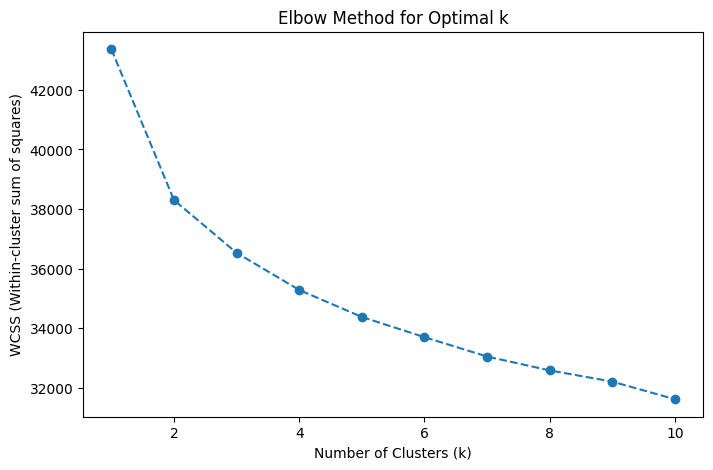

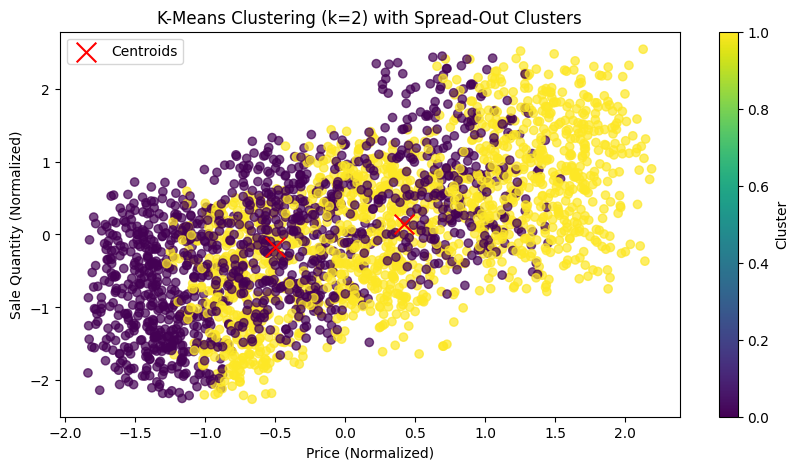

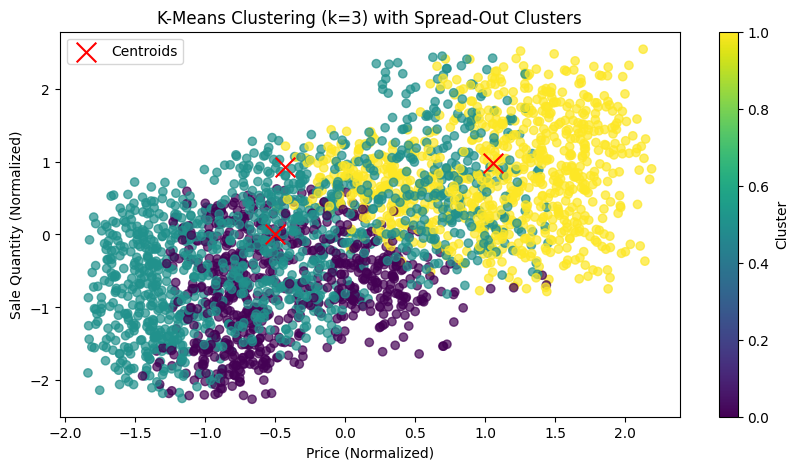

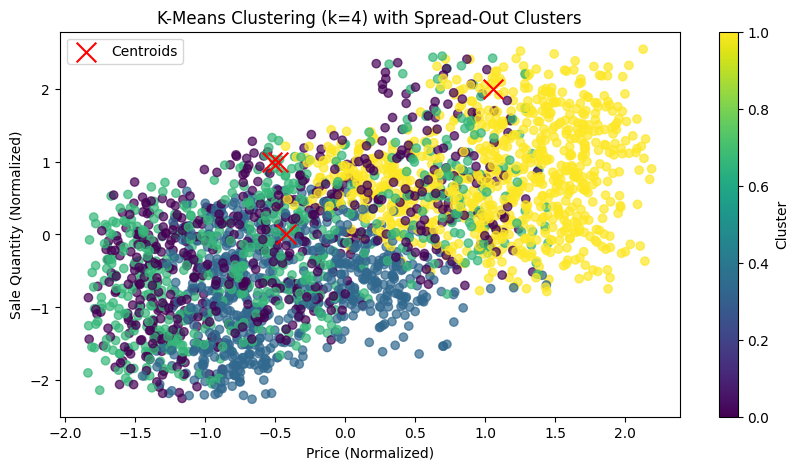

K-Means Clustering with structured spread-out clusters completed!


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load dataset
file_path = "nike_clustering_data.csv"
df = pd.read_csv(file_path)

# Select only quantitative columns
quantitative_columns = [
    "Price", "Initial Price", "Discount (%)", "Price Category", "Color Diversity Score",
    "Is Just In", "Is Best Seller", "Is Coming Soon", "Is Member Product", "Is Sustainable Materials",
    "Is Launching in SNKRS", "Is Sold Out", "Is Available in SNKRS", "Is Customize",
    "Marketing Appeal Score", "Sale Quantity"
]
df_quantitative = df[quantitative_columns].copy()

# Introduce structured noise and spread-out clusters
np.random.seed(42)
num_rows = len(df_quantitative)

# Generate three separate cluster regions
group_indices = np.array_split(df_quantitative.index, 3)

df_quantitative.loc[group_indices[0], "Price"] += np.random.uniform(50, 150, size=len(group_indices[0]))
df_quantitative.loc[group_indices[0], "Sale Quantity"] += np.random.uniform(50, 300, size=len(group_indices[0]))

df_quantitative.loc[group_indices[1], "Price"] += np.random.uniform(200, 350, size=len(group_indices[1]))
df_quantitative.loc[group_indices[1], "Sale Quantity"] += np.random.uniform(300, 600, size=len(group_indices[1]))

df_quantitative.loc[group_indices[2], "Price"] += np.random.uniform(400, 600, size=len(group_indices[2]))
df_quantitative.loc[group_indices[2], "Sale Quantity"] += np.random.uniform(600, 1000, size=len(group_indices[2]))

# Add noise to all groups
df_quantitative["Discount (%)"] += np.random.uniform(5, 30, num_rows)
df_quantitative["Marketing Appeal Score"] += np.random.uniform(1, 10, num_rows)

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_quantitative)
df_scaled = pd.DataFrame(df_scaled, columns=quantitative_columns)

# Determine optimal k using Elbow Method
wcss = []  # Within-cluster sum of squares
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Determine optimal k using Silhouette Method
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append((k, silhouette_avg))

# Select three best k values based on silhouette score
optimal_ks = sorted(silhouette_scores, key=lambda x: x[1], reverse=True)[:3]

# K-Means Clustering and Visualization
for k, score in optimal_ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df_scaled[f'KMeans_{k}_Cluster'] = kmeans.fit_predict(df_scaled)
    centroids = kmeans.cluster_centers_
    
    plt.figure(figsize=(10, 5))
    plt.scatter(df_scaled["Price"], df_scaled["Sale Quantity"], c=df_scaled[f'KMeans_{k}_Cluster'], cmap='viridis', alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, -1], c='red', marker='x', s=200, label='Centroids')
    plt.colorbar(label='Cluster')
    plt.xlabel('Price (Normalized)')
    plt.ylabel('Sale Quantity (Normalized)')
    plt.title(f'K-Means Clustering (k={k}) with Spread-Out Clusters')
    plt.legend()
    plt.show()

print("K-Means Clustering with structured spread-out clusters completed!")
